# Feature Selection

Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

It helps in reducing model complexity, increasing accuracy, and reducing the risk of overfitting.

## Correlation Coefficient

Select features highly correlated with the target variable.

In correlation analysis, the value of the correlation coefficient indicates the strength and direction of the relationship between two variables. The correlation coefficient, often denoted as ( r ), ranges from -1 to 1.

- ( r = 1 ): Perfect positive correlation. As one variable increases, the other variable increases proportionally.
- ( r = -1 ): Perfect negative correlation. As one variable increases, the other variable decreases proportionally.
- ( r = 0 ): No correlation. There is no linear relationship between the variables.


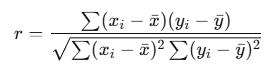

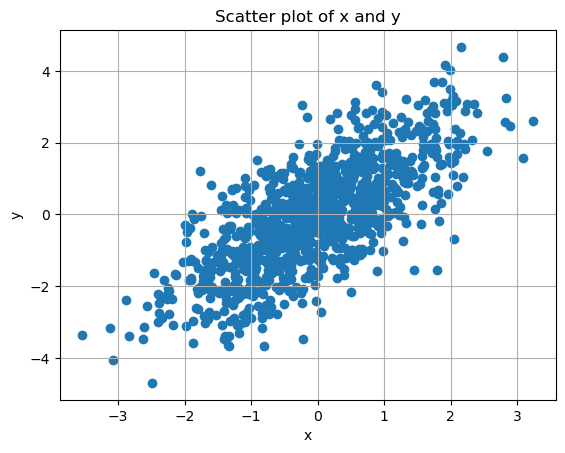

Correlation coefficient:


array([[1.        , 0.72258575],
       [0.72258575, 1.        ]])

In [68]:
# Write sample code to show Correlation between two variables

import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 1000
x = np.random.randn(N)
y = x + np.random.randn(N)

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
corr = np.corrcoef(x, y)
print('Correlation coefficient:')
corr





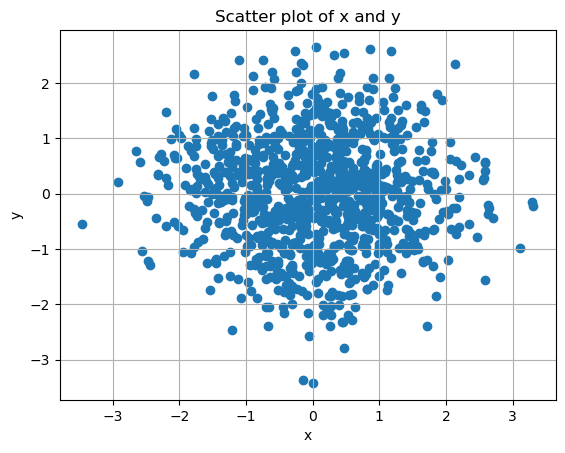

Correlation coefficient:


array([[ 1.        , -0.02656738],
       [-0.02656738,  1.        ]])

In [3]:
# Write sample code to show Correlation between two variables that are not correlated

# Create data
N = 1000
x = np.random.randn(N)
y = np.random.randn(N)

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
corr = np.corrcoef(x, y)
print('Correlation coefficient:')
corr

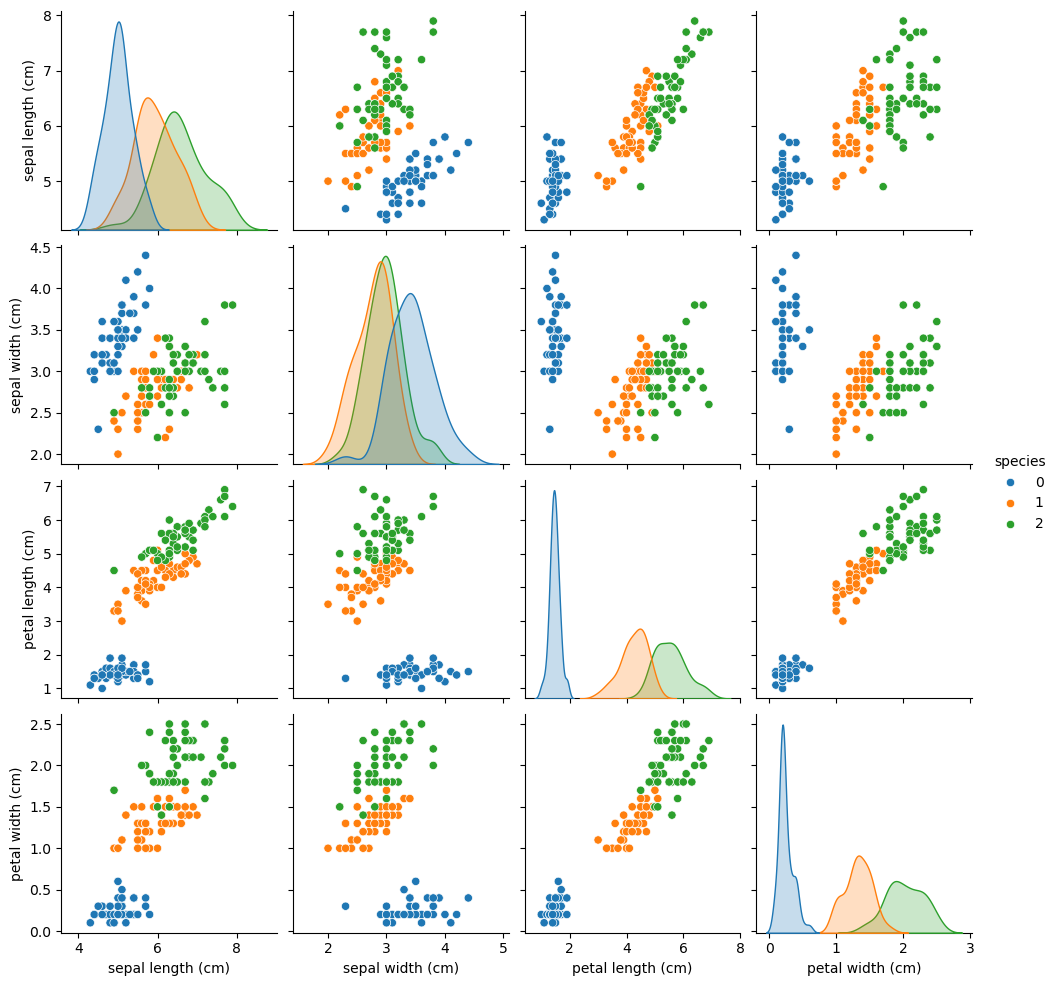

Correlation coefficient:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [7]:
# show the correlation between features and labels in iris dataset
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Convert the species to numerical values and use map to convert the species to numerical values
iris_df['species'] = iris_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Create a pairplot
sns.pairplot(iris_df, hue='species')
plt.show()



# Calculate the correlation coefficient
corr = iris_df.corr()
print('Correlation coefficient:')
corr

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Age Group': ['Youth', 'Adult', 'Senior', 'Youth', 'Adult', 'Senior', 'Youth', 'Adult'],
    'Income': [50, 40, 70, 20, 60, 80, 25, 30],
    'Purchased': [1, 0, 1, 0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

# Encode categorical features using LabelEncoder for age group
label_encoder_age = LabelEncoder()
df['AgeGroup_encoded'] = label_encoder_age.fit_transform(df['Age Group'])

# Encode categorical features using onehot for gender using get_dummies
onehot_encoder = OneHotEncoder()
df = pd.get_dummies(df, columns=['Gender'])

print("Encoded Dataset:")
print(df)

Original Dataset:
   Gender Age Group  Income  Purchased
0    Male     Youth      50          1
1  Female     Adult      40          0
2  Female    Senior      70          1
3    Male     Youth      20          0
4  Female     Adult      60          1
5    Male    Senior      80          1
6  Female     Youth      25          0
7    Male     Adult      30          0
Encoded Dataset:
  Age Group  Income  Purchased  AgeGroup_encoded  Gender_Female  Gender_Male
0     Youth      50          1                 2          False         True
1     Adult      40          0                 0           True        False
2    Senior      70          1                 1           True        False
3     Youth      20          0                 2          False         True
4     Adult      60          1                 0           True        False
5    Senior      80          1                 1          False         True
6     Youth      25          0                 2           True        Fals

In [11]:


# Drop the original categorical columns
df.drop(['Age Group'], axis=1, inplace=True)

# Calculate the correlation coefficient
corr = df.corr()
print('Correlation coefficient:')
corr

Correlation coefficient:


,Income,Purchased,AgeGroup_encoded,Gender_Female,Gender_Male
Income,1.000000,0.886142,-0.246986,0.091670,-0.091670
Purchased,0.886142,1.000000,0.000000,0.000000,0.000000
AgeGroup_encoded,-0.246986,0.000000,1.000000,-0.288675,0.288675
Gender_Female,0.091670,0.000000,-0.288675,1.000000,-1.000000
Gender_Male,-0.091670,0.000000,0.288675,-1.000000,1.000000


### **Corr does not work with object column**

## Chi-Square Test and f_regression with SelectKBest

- Chi-Square is a statistical test used for categorical features to determine the association with the target variable.
- The observed and expected frequencies are calculated for each category of the feature and target.
- The Chi-Square formula is used to sum up the squared differences between observed and expected values, divided by the expected value.
- The chi2 score function is designed for **categorical target variables**, not continuous ones like ratings or prices.
- f_regression can be used for continous target variable.
- SelectKBest is a functionality that automatically calculates the relevant formula and save the corresposing features.

In [66]:
# Example with SelectKBest and chi2
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Convert the dataset into a pandas DataFrame
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Age Group': ['Youth', 'Adult', 'Senior', 'Youth', 'Adult', 'Senior', 'Youth', 'Adult'],
    'Income': [50, 40, 70, 20, 60, 80, 25, 30],
    'Purchased': [1, 0, 1, 0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Encode the categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Age Group'])

# Separate features and target variable
X = df_encoded.drop('Purchased', axis=1)
y = df_encoded['Purchased']

# Use a feature selection method (e.g., SelectKBest with chi2)
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores)

# Select the top k=4 features
selector = SelectKBest(score_func=chi2, k=4)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
print('Selected Features:')
print(selected_features)

# Calculate the correlation coefficient
corr = df_encoded.corr()
print('Correlation coefficient:')
corr



            Feature      Score
0            Income  56.066667
1     Gender_Female   0.000000
2       Gender_Male   0.000000
3   Age Group_Adult   0.333333
4  Age Group_Senior   2.000000
5   Age Group_Youth   0.333333
Selected Features:
Index(['Income', 'Age Group_Adult', 'Age Group_Senior', 'Age Group_Youth'], dtype='object')
Correlation coefficient:


,Income,Purchased,Gender_Female,Gender_Male,Age Group_Adult,Age Group_Senior,Age Group_Youth
Income,1.000000,0.886142,9.166985e-02,-9.166985e-02,-0.134125,7.938842e-01,-0.575947
Purchased,0.886142,1.000000,0.000000e+00,0.000000e+00,-0.258199,5.773503e-01,-0.258199
Gender_Female,0.091670,0.000000,1.000000e+00,-1.000000e+00,0.258199,3.204938e-17,-0.258199
Gender_Male,-0.091670,0.000000,-1.000000e+00,1.000000e+00,-0.258199,-3.204938e-17,0.258199
Age Group_Adult,-0.134125,-0.258199,2.581989e-01,-2.581989e-01,1.000000,-4.472136e-01,-0.600000
Age Group_Senior,0.793884,0.577350,3.204938e-17,-3.204938e-17,-0.447214,1.000000e+00,-0.447214
Age Group_Youth,-0.575947,-0.258199,-2.581989e-01,2.581989e-01,-0.600000,-4.472136e-01,1.000000


In [61]:
# Example with SelectKBest and f_regression
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Age Group': ['Youth', 'Adult', 'Senior', 'Youth', 'Adult', 'Senior', 'Youth', 'Adult'],
    'Income': [50, 40, 70, 20, 60, 80, 25, 30],
    'Purchased': [1, 0, 1, 0, 1, 1, 0, 0],
    'Rating': [7.5, 6.0, 8.0, 5.5, 7.0, 8.5, 6.5, 5.0]
}
df = pd.DataFrame(data)

# Encode the Gender column using label encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Encode the Age Group column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Age Group'])

# Separate features and target variable
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

# Use SelectKBest with f_regression to select top features
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print('Feature scores:')
print(feature_scores)

# Select the top k features with more than 10 score
selected_features = feature_scores[feature_scores['Score'] > 10]
print('Selected features:')
print(selected_features)

# Save the selected features as X and y for Rating
X = X[selected_features['Feature']]
y = df_encoded['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)




Feature scores:
            Feature      Score
0            Gender   0.072289
1            Income  22.102041
2         Purchased  19.200000
3   Age Group_Adult   2.076923
4  Age Group_Senior   8.000000
5   Age Group_Youth   0.176471
Selected features:
     Feature      Score
1     Income  22.102041
2  Purchased  19.200000
Mean Squared Error: 0.33680555555555614


### Same data without Feature Selection

In [62]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Age Group': ['Youth', 'Adult', 'Senior', 'Youth', 'Adult', 'Senior', 'Youth', 'Adult'],
    'Income': [50, 40, 70, 20, 60, 80, 25, 30],
    'Purchased': [1, 0, 1, 0, 1, 1, 0, 0],
    'Rating': [7.5, 6.0, 8.0, 5.5, 7.0, 8.5, 6.5, 5.0]
}
df = pd.DataFrame(data)

# Encode the Gender column using label encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Encode the Age Group column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Age Group'])

# Separate features and target variable
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 1.6250000000000009
